In [69]:
import numpy as pd
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import statsmodels.api as sms

In [70]:
# import data
df=pd.read_csv("data/CarPrice_Assignment.csv")
price=df[["price"]]
wheelbase=df[["wheelbase"]]
carlength=df[["carlength"]]
carwidth=df[["carwidth"]]
carheight=df[["carheight"]]
curbweight=df[["curbweight"]]
enginesize=df[["enginesize"]]
horsepower=df[["horsepower"]]
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


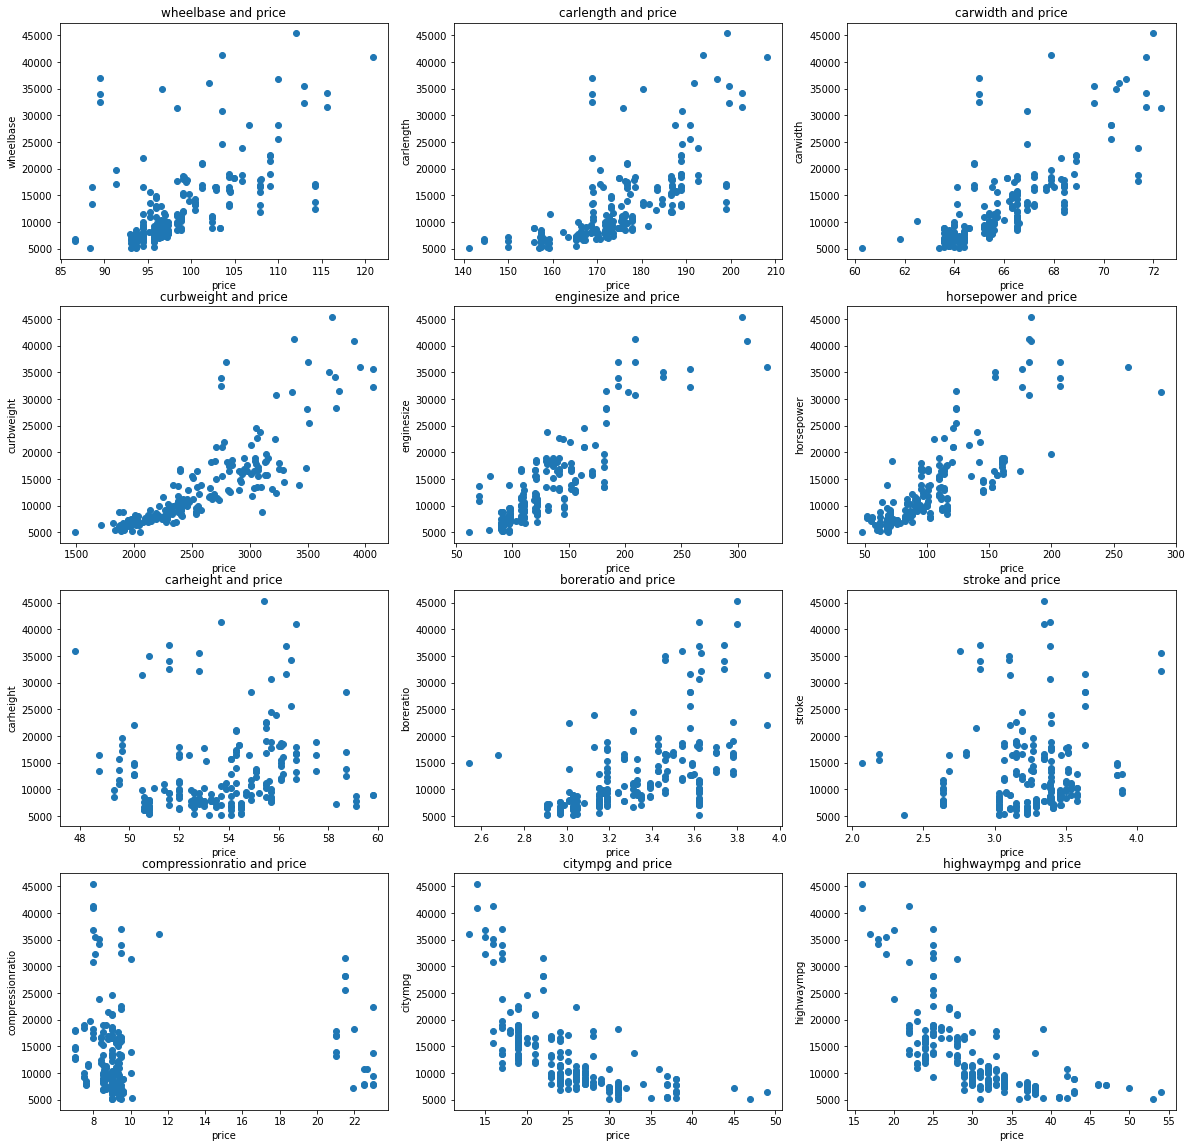

In [71]:
#-Visualization
def scatter(x,fig):
    plt.subplot(4,3,fig)
    plt.scatter(df[[x]],price)
    plt.title(x + ' and price')
    plt.xlabel('price')
    plt.ylabel(x)
plt.figure(figsize=(20,20))
scatter("wheelbase",1)
scatter("carlength",2)
scatter("carwidth",3)
scatter("curbweight",4)
scatter("enginesize",5)
scatter("horsepower",6)
scatter("carheight",7)
scatter("boreratio",8)
scatter("stroke",9)
scatter("compressionratio",10)
scatter("citympg",11)
scatter("highwaympg",12)
plt.show()

In [98]:
import numpy as np
curbweight,price=np.array(curbweight), np.array(price)
curbweight=sms.add_constant(curbweight)
model=sms.OLS(price,curbweight).fit()
curbweight

array([[1.000e+00, 2.548e+03],
       [1.000e+00, 2.548e+03],
       [1.000e+00, 2.823e+03],
       [1.000e+00, 2.337e+03],
       [1.000e+00, 2.824e+03],
       [1.000e+00, 2.507e+03],
       [1.000e+00, 2.844e+03],
       [1.000e+00, 2.954e+03],
       [1.000e+00, 3.086e+03],
       [1.000e+00, 3.053e+03],
       [1.000e+00, 2.395e+03],
       [1.000e+00, 2.395e+03],
       [1.000e+00, 2.710e+03],
       [1.000e+00, 2.765e+03],
       [1.000e+00, 3.055e+03],
       [1.000e+00, 3.230e+03],
       [1.000e+00, 3.380e+03],
       [1.000e+00, 3.505e+03],
       [1.000e+00, 1.488e+03],
       [1.000e+00, 1.874e+03],
       [1.000e+00, 1.909e+03],
       [1.000e+00, 1.876e+03],
       [1.000e+00, 1.876e+03],
       [1.000e+00, 2.128e+03],
       [1.000e+00, 1.967e+03],
       [1.000e+00, 1.989e+03],
       [1.000e+00, 1.989e+03],
       [1.000e+00, 2.191e+03],
       [1.000e+00, 2.535e+03],
       [1.000e+00, 2.811e+03],
       [1.000e+00, 1.713e+03],
       [1.000e+00, 1.819e+03],
       [

In [99]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.698
Model:                            OLS   Adj. R-squared:                  0.696
Method:                 Least Squares   F-statistic:                     468.6
Date:                Thu, 21 Jul 2022   Prob (F-statistic):           1.21e-54
Time:                        01:32:13   Log-Likelihood:                -2009.8
No. Observations:                 205   AIC:                             4024.
Df Residuals:                     203   BIC:                             4030.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.948e+04   1543.962    -12.614      0.000   -2.25e+04   -1.64e+04
x1            12.8162      0.592     21.647      0.000      11.649      13.984
==============================================================================
Omnibus:                       85.362   Durbin-Watson:                   0.575
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              382.847
Skew:                           1.591   Prob(JB):                     7.34e-84
Kurtosis:                       8.890   Cond. No.                     1.31e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.31e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [101]:
x_new=np.array([2748,2983])
x_new=sms.add_constant(x_new)
predicted_future_value =model.predict(x_new)
predicted_future_value

array([15742.97979533, 18754.78034529])

In [1]:
plt.plot(df['price'],linestyle='--', color='g', label='Actual')
plt.plot(predicted_future_value,linestyle='--', marker='x',color='b',label='predict')
plt.xlabel("price")
plt.ylabel("curbweight")
plt.legend()
plt.show()

NameError: name 'plt' is not defined